# Machine learning course

[Supervised learning](#2.1-Supervised-learning)
    
[Unsupervised learning](#2.2-Unsupervised-learning)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 2.1 Supervised learning

The algorithm receives a set of categorical input variables and also a correct output. The goal is to find a function that models input with respect to output.

- A continuous output variable yields a regression problem.
- A categorial output variable yields a classification problem.

In [34]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


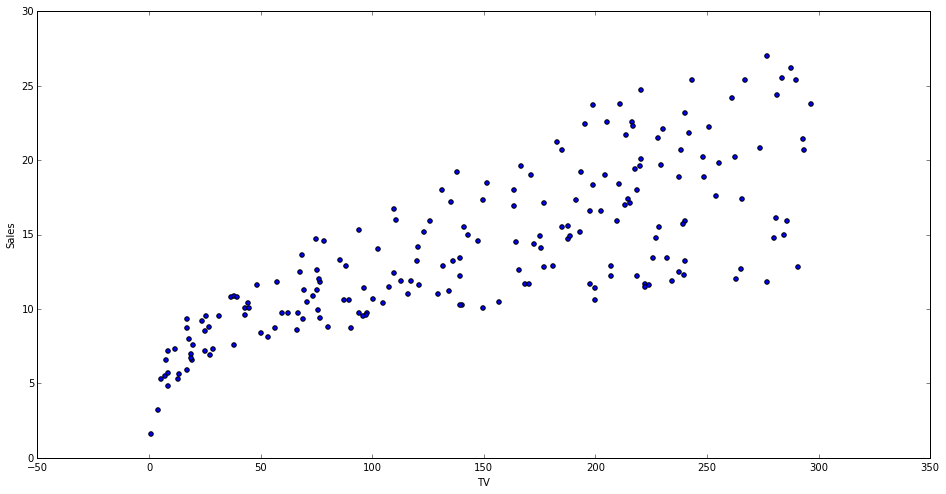

In [35]:
# visualize the relationship between the features and the response using scatterplots
data.plot(kind='scatter', x='TV', y='Sales', figsize=(16, 8))

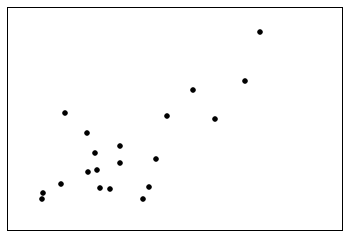

In [30]:
from sklearn import datasets

# Load the diabetes dataset
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.xticks(())
plt.yticks(())
plt.show()

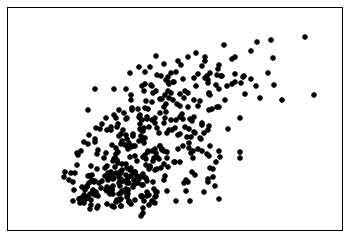

In [32]:
plt.scatter(diabetes_X, diabetes.target,  color='black')
plt.xticks(())
plt.yticks(())
plt.show()

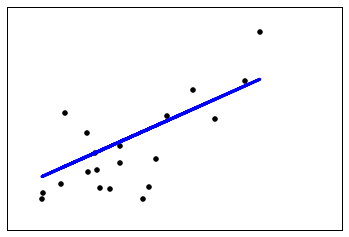

In [33]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

number of classes 2


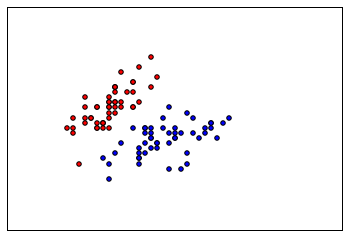

In [47]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target
h = .02

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

classes = list(set(y))[:2]
print 'number of classes', len(classes)

# Plot also the training points
colors = ['red', 'blue', 'green']
for n, k in enumerate(classes):
    loc = np.where(y == k)
    plt.scatter(X[loc, 0], X[loc, 1], c=colors[n])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

number of classes 3


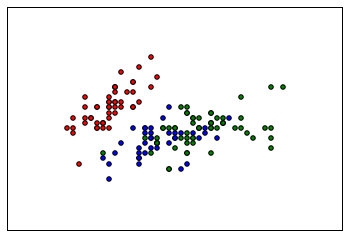

In [48]:
classes = list(set(y))
print 'number of classes', len(classes)

# Plot also the training points
colors = ['red', 'blue', 'green']
for n, k in enumerate(classes):
    loc = np.where(y == k)
    plt.scatter(X[loc, 0], X[loc, 1], c=colors[n])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

## 2.1.1 Evaluation

Most common technique for Regression evaluation is R2 score. It measures dispersion from the real value and the predicted one.

The closer to 1.00 (perfect fit) the better the model r2 score

Considered the first example.

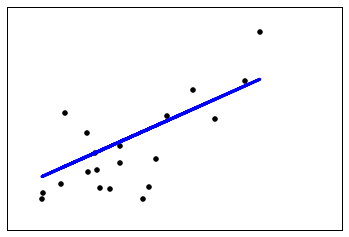

r2 score: 0.47
perfect fit 1.00


In [69]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()


from sklearn.metrics import r2_score


y_true = diabetes_y_test
y_pred = regr.predict(diabetes_X_test)
print 'r2 score: {:.2f}'.format(r2_score(y_true, y_pred))
print 'perfect fit {:.2f}'.format(r2_score(y_true, y_true))

According to [wikipedia.](https://en.wikipedia.org/wiki/Precision_and_recall)

For classification tasks there is four possible scenarios:

<table>
<tbody><tr>
<td>true positives<br>
<td>false positives<br>
</td>
</tr>
<tr>
<td>false negatives<br>
</td>
<td>true negatives<br>
</td>
</tr>
</tbody></table>


This table is also known as confusion matrix

Confusion matrix allow us to compute sensitivity and specificity

#### Sensitivity

sensitivity = $\frac{TP}{TP+FN}$

the higher the sensitivity the lower the number of false negatives


#### Specificity

specificity = $\frac{TN}{TN+FP}$


the higher the specificity the lower the number of false positives

In general we prefer reduce the number of false positives.
From confusion matrix we are also able to plot precision-recall curves

Recall in this context is also referred to as the true positive rate or sensitivity, 
and precision is also referred to as positive predictive value (PPV)

precision = $\frac{TP}{TP+FP}$

In [84]:
from sklearn.metrics import classification_report
y_true = [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
y_pred = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]

target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.80      0.67      0.73         6
    class 1       0.71      0.83      0.77         6

avg / total       0.76      0.75      0.75        12



In [102]:
print 'class0 precision {:.2f}'.format(4 / 5.)
print 'class1 precision {:.2f}'.format(5 / 7.)

print '\nclass0 recall {:.2f}'.format(4 / 6.)
print 'class1 recall {:.2f}'.format(5 / 6.)

print '\nclass0 f1score {:.2f}'.format(2*((.8*.67)/(.8+.67)))
print 'class1 f1score {:.2f}'.format(2*((.71*.83)/(.71+.83)))

print '\nclass0 support {}'.format(len([y for y in y_true if y == 0]))
print 'class1 support {}'.format(len([y for y in y_true if y == 1]))

class0 precision 0.80
class1 precision 0.71

class0 recall 0.67
class1 recall 0.83

class0 f1score 0.73
class1 f1score 0.77

class0 support 6
class1 support 6


## 2.1.2 Splitting training set

In most real cases, there is only one training set, thus there is no how to validate a generated model.

In order to address this problem the dataset is randomly divided into three different sets.

- ***training*** in general the largest set used for create a model
- ***validation*** (optional) used to metric and correct (if is the case) the model during training
- ***test assess*** the performance of a final model

# 2.2 Unsupervised learning

In unsupervised learning there is no information about the output. The method should discovery relations by itself

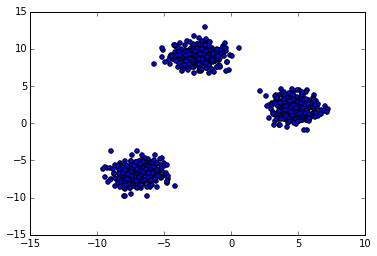

In [70]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, random_state=42)
plt.scatter(X[:, 0], X[:, 1])

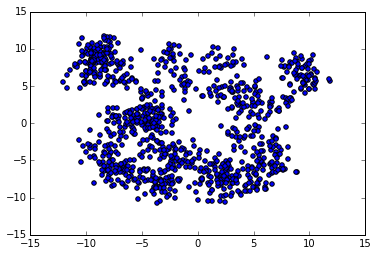

In [71]:
X, y = make_blobs(n_samples=1000, centers=42, random_state=42)
plt.scatter(X[:, 0], X[:, 1])

## 2.2.1 Evaluation

As there is no previous known data it is harder to evaluate. According to the adopted method, for instance k-means, will be available a measure of dispersion of each cluster.

Considering k-means the biggest problem is the definition of cluster number. For example on the picture below if the number of cluster was set to a number different of three it will lead to undesirable result.

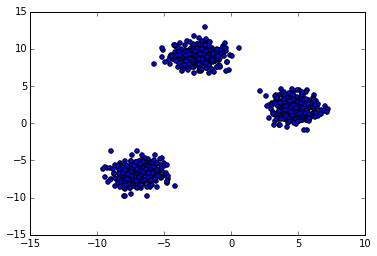

In [103]:
X, y = make_blobs(n_samples=1000, random_state=42)
plt.scatter(X[:, 0], X[:, 1])